In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd


# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

- Buscar un conjunto de datos a analizar. 
Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico.

In [2]:
df=pd.read_csv("datos/airline.csv", index_col=False)
df.head(2)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0


In [3]:
df.drop(['Departure/Arrival time convenient', 'Gate location','Inflight wifi service',
'Online support', 'Leg room service','Baggage handling','Departure Delay in Minutes', 'Arrival Delay in Minutes'],axis=1, inplace=True)

- Explicar los datos y las variables disponibles en el conjunto de datos seleccionado

- Realizar un EDA sencillo poniendo en práctica los conocimientos adquiridos hasta el momento y explica los resultados

In [4]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Food and drink,Inflight entertainment,Ease of Online booking,On-board service,Checkin service,Cleanliness,Online boarding
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,4,3,3,5,3,2
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,2,3,4,2,3,2
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,2,3,4,4,2
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,4,1,1,4,1,3
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,3,2,2,4,2,5


### Hipotesis
Influye ser Loyal Customer en la satisfacción del vuelo?

- H0: Ser Loyal Customer no influye en la satisfacción
- H1: Ser Loyal Custumer si influye en la satisfacción

Definimos nuestra variable categorica la cual es : "satisfaction", vamos a ver la cantidad de valores que tenemos para la variable respuesta.

In [5]:
df["satisfaction"].value_counts()

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

Antes de empezar el EDA vemos la necesidad de reducir columnas debido al poco tiempo que tenemos y nos quedaremos sólo con las que consideremos más interesantes.

In [6]:
df.shape

(129880, 15)

In [7]:
df.head(2)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Food and drink,Inflight entertainment,Ease of Online booking,On-board service,Checkin service,Cleanliness,Online boarding
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,4,3,3,5,3,2
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,2,3,4,2,3,2


In [8]:
df.dtypes

satisfaction              object
Gender                    object
Customer Type             object
Age                        int64
Type of Travel            object
Class                     object
Flight Distance            int64
Seat comfort               int64
Food and drink             int64
Inflight entertainment     int64
Ease of Online booking     int64
On-board service           int64
Checkin service            int64
Cleanliness                int64
Online boarding            int64
dtype: object

In [9]:
df.isnull().sum()

satisfaction              0
Gender                    0
Customer Type             0
Age                       0
Type of Travel            0
Class                     0
Flight Distance           0
Seat comfort              0
Food and drink            0
Inflight entertainment    0
Ease of Online booking    0
On-board service          0
Checkin service           0
Cleanliness               0
Online boarding           0
dtype: int64

In [10]:
df.describe(include=int).T

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0
Seat comfort,129880.0,2.838597,1.392983,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,2.851994,1.443729,0.0,2.0,3.0,4.0,5.0
Inflight entertainment,129880.0,3.383477,1.346059,0.0,2.0,4.0,4.0,5.0
Ease of Online booking,129880.0,3.472105,1.305560,0.0,2.0,4.0,5.0,5.0
On-board service,129880.0,3.465075,1.270836,0.0,3.0,4.0,4.0,5.0
Checkin service,129880.0,3.340807,1.260582,0.0,3.0,3.0,4.0,5.0
Cleanliness,129880.0,3.705759,1.151774,0.0,3.0,4.0,5.0,5.0
Online boarding,129880.0,3.352587,1.298715,0.0,2.0,4.0,4.0,5.0


In [11]:
df.describe(include="object").T

,count,unique,top,freq
satisfaction,129880,2,satisfied,71087
Gender,129880,2,Female,65899
Customer Type,129880,2,Loyal Customer,106100
Type of Travel,129880,2,Business travel,89693
Class,129880,3,Business,62160


In [12]:
#Miramos los duplicados
df.duplicated().sum()

9

In [13]:
#Los eliminamos
df.drop_duplicates(inplace=True)

In [14]:
#Verificamos
df.duplicated().sum()

0

Listo ya no tenemos nulos. continuemos...

#### Analisis exploratorio visual

Variable respuesta

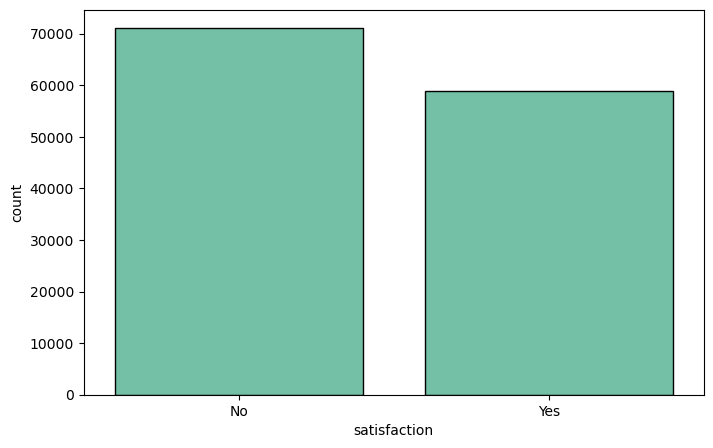

In [15]:
plt.figure(figsize=(8,5)) # para cambiar el tamaño de la figura

fig1 = sns.countplot(data = df, x = "satisfaction",  color = "mediumaquamarine",  edgecolor='black')
fig1.set(xticklabels=["No", "Yes"]) 
plt.show();

In [16]:
(df['satisfaction'].value_counts()/df.shape[0])*100

satisfied       54.729693
dissatisfied    45.270307
Name: satisfaction, dtype: float64

Con respecto al desbalanceo de nuestra variable respuesta, vemos que éste es practicametne inexistente.

Variables categoricas

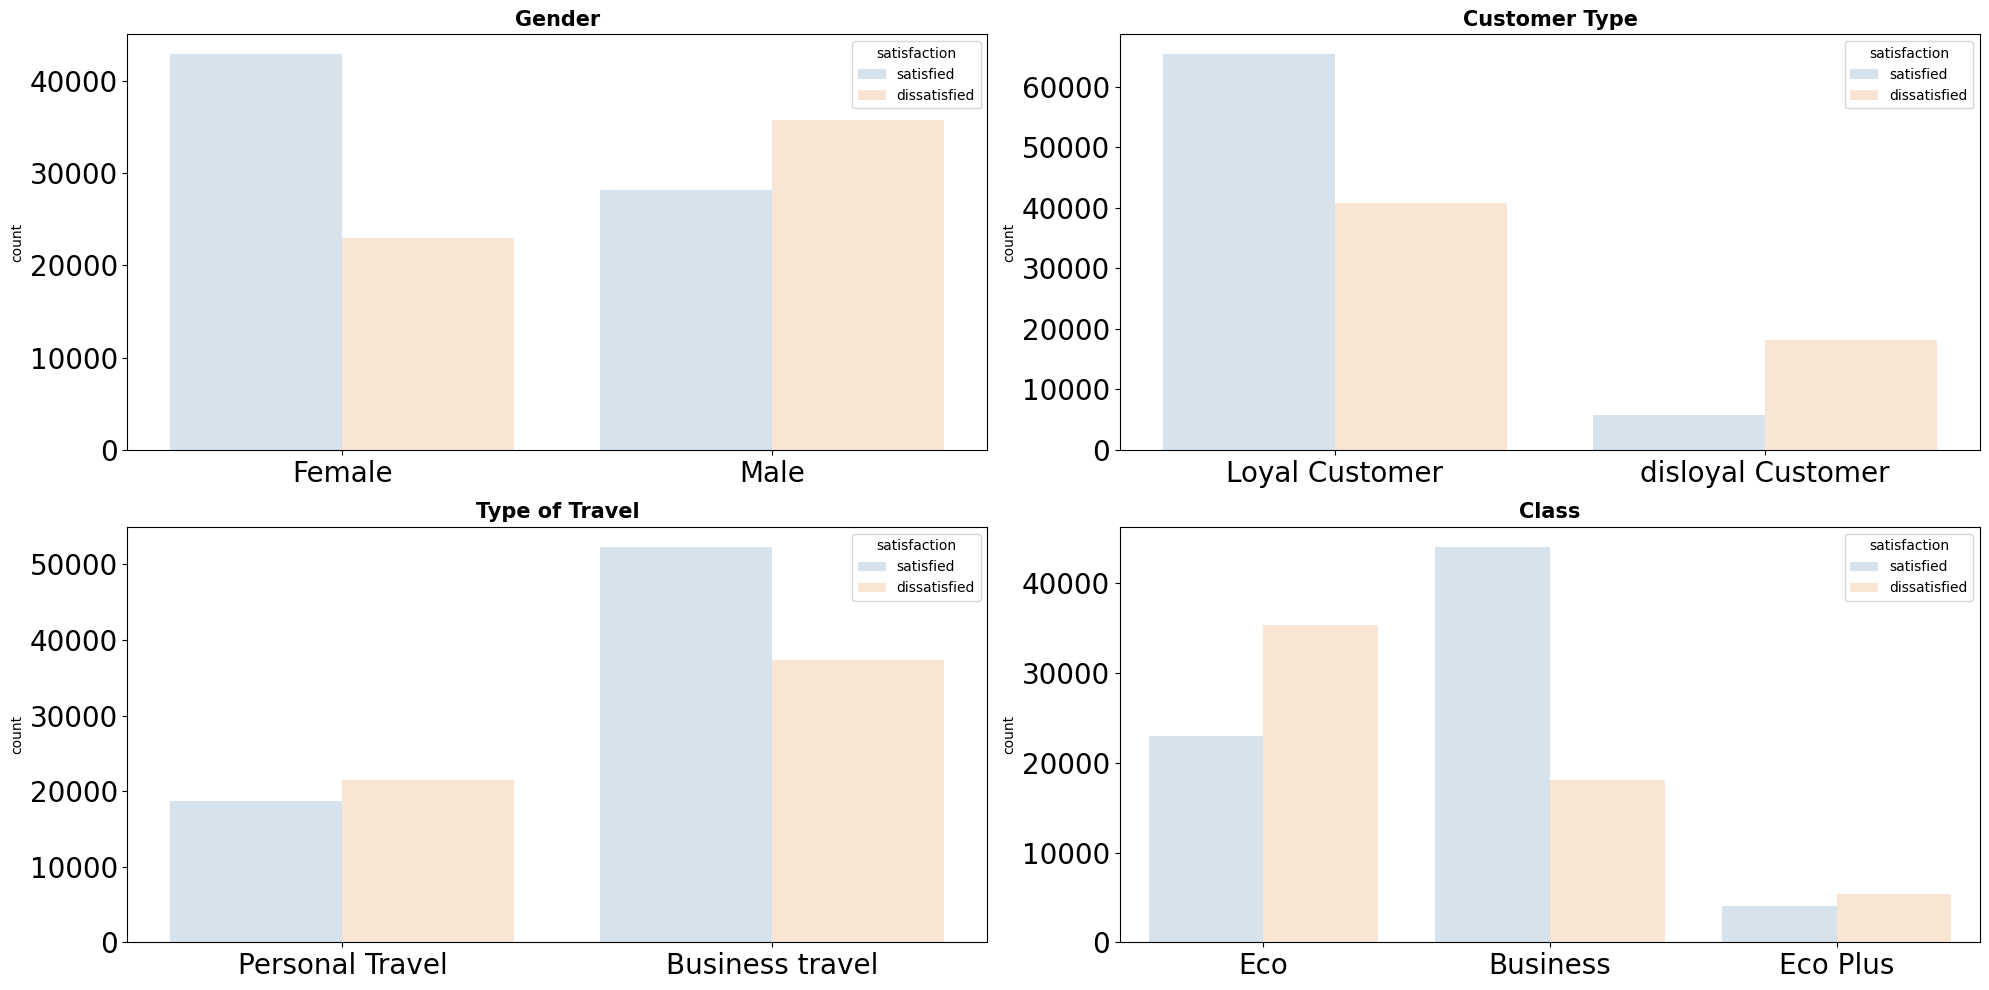

In [17]:
# Gráfico de distribución para cada variable categórica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))

axes = axes.flat
columnas_cat = df.select_dtypes(include = "object").columns.drop("satisfaction")

for i, colum in enumerate(columnas_cat): 
    sns.countplot(
        data = df,
        x = colum,
        hue = "satisfaction",
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    #axes[i].legend(loc= "upper right")

fig.tight_layout();

Como primeras conclusiones podemos decir que las mujeres suelen estar más satisfechas con los vuelos que los hombres, que la mayoría de los clientes forman parte del programa de loyal customer, que significa que acumulan puntos por viaje y se benefician de una serie de ventajas por viajar frecuentemente con la compañia. De esta forma, podemos intuir que estos clientes responden una opinión basada en más viajes que los no loyal. Estos clientes vemos que mayoritariamente están satisfechos, mientras que si vemos a los disloyal, mayoritariamente están insatisfechos. Este se puede deber a los befenicios que obtienen los loyal o a la casualidad de que los disloyal hayan coincido con algun vuelo que no fue tan bueno (no viajan tan frecuentemente).
Además vemos que esta compañía opera vuelos que mayoritariamente incluyen a personas que viajan por negocios. 
Finalmente, por lo que hacen las clases, vemos diferencia entre eco y business en la satisfacción, teniendo más pasajeros satisfechos en business que en eco y, vemos que la clase eco plus es la menos frecuentada en los enquestados.

Variables numericas

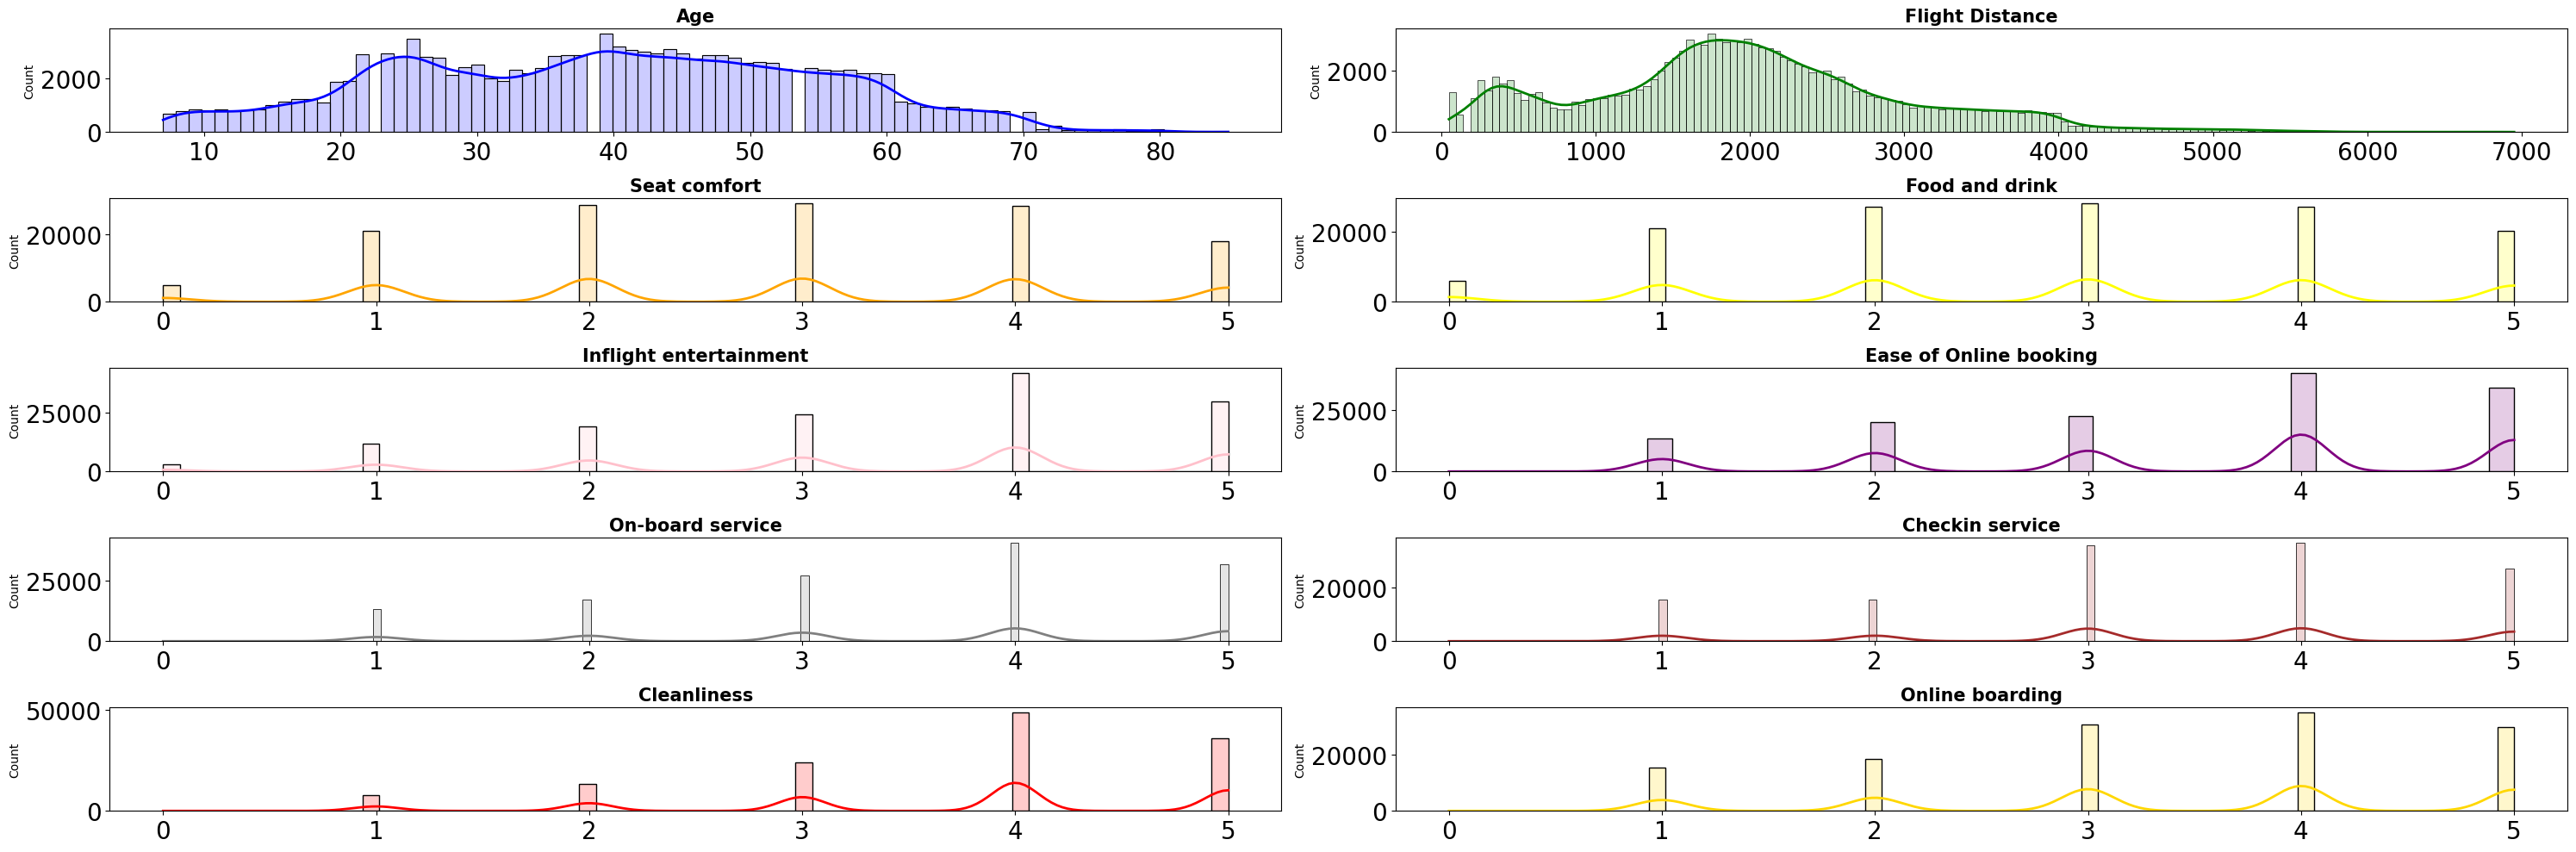

In [18]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (30, 10))

lista_colores = ["blue", "green", "orange",'yellow','pink','purple','grey','brown','red','gold']

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
fig.tight_layout();


Como vemos en nuestro análisis exploratorio, la mayoria de las edades se concentran entre los 25 y 44 años, aunque tenemos datos desde los 7 años y los 85.
Por lo que hacen las distancias de los vuelos, hemos asumido que los datos están en millas, y vemos que, de media, los vuelos no son excesivamente largos, (la media de 2000 millas equivaldria a un vuelo de españa a turquia, o de españa a noruega, para hacernos una idea).

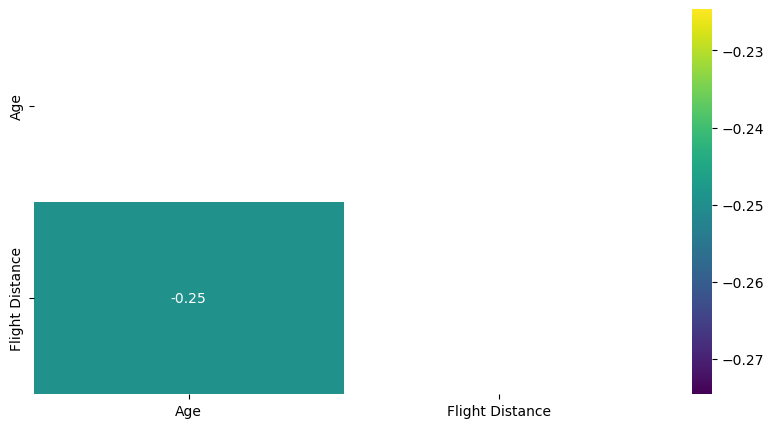

In [19]:
# Hacemos un heatmap con las variables numéricas contínuas
df_numericas = df[['Age','Flight Distance']]
correlacion = df_numericas.corr()
plt.figure(figsize=(10,5))
mask = np.triu(np.ones_like(correlacion, dtype=bool))
sns.heatmap(correlacion, cmap="viridis", annot = True, mask = mask); #barra lateral

Outliers

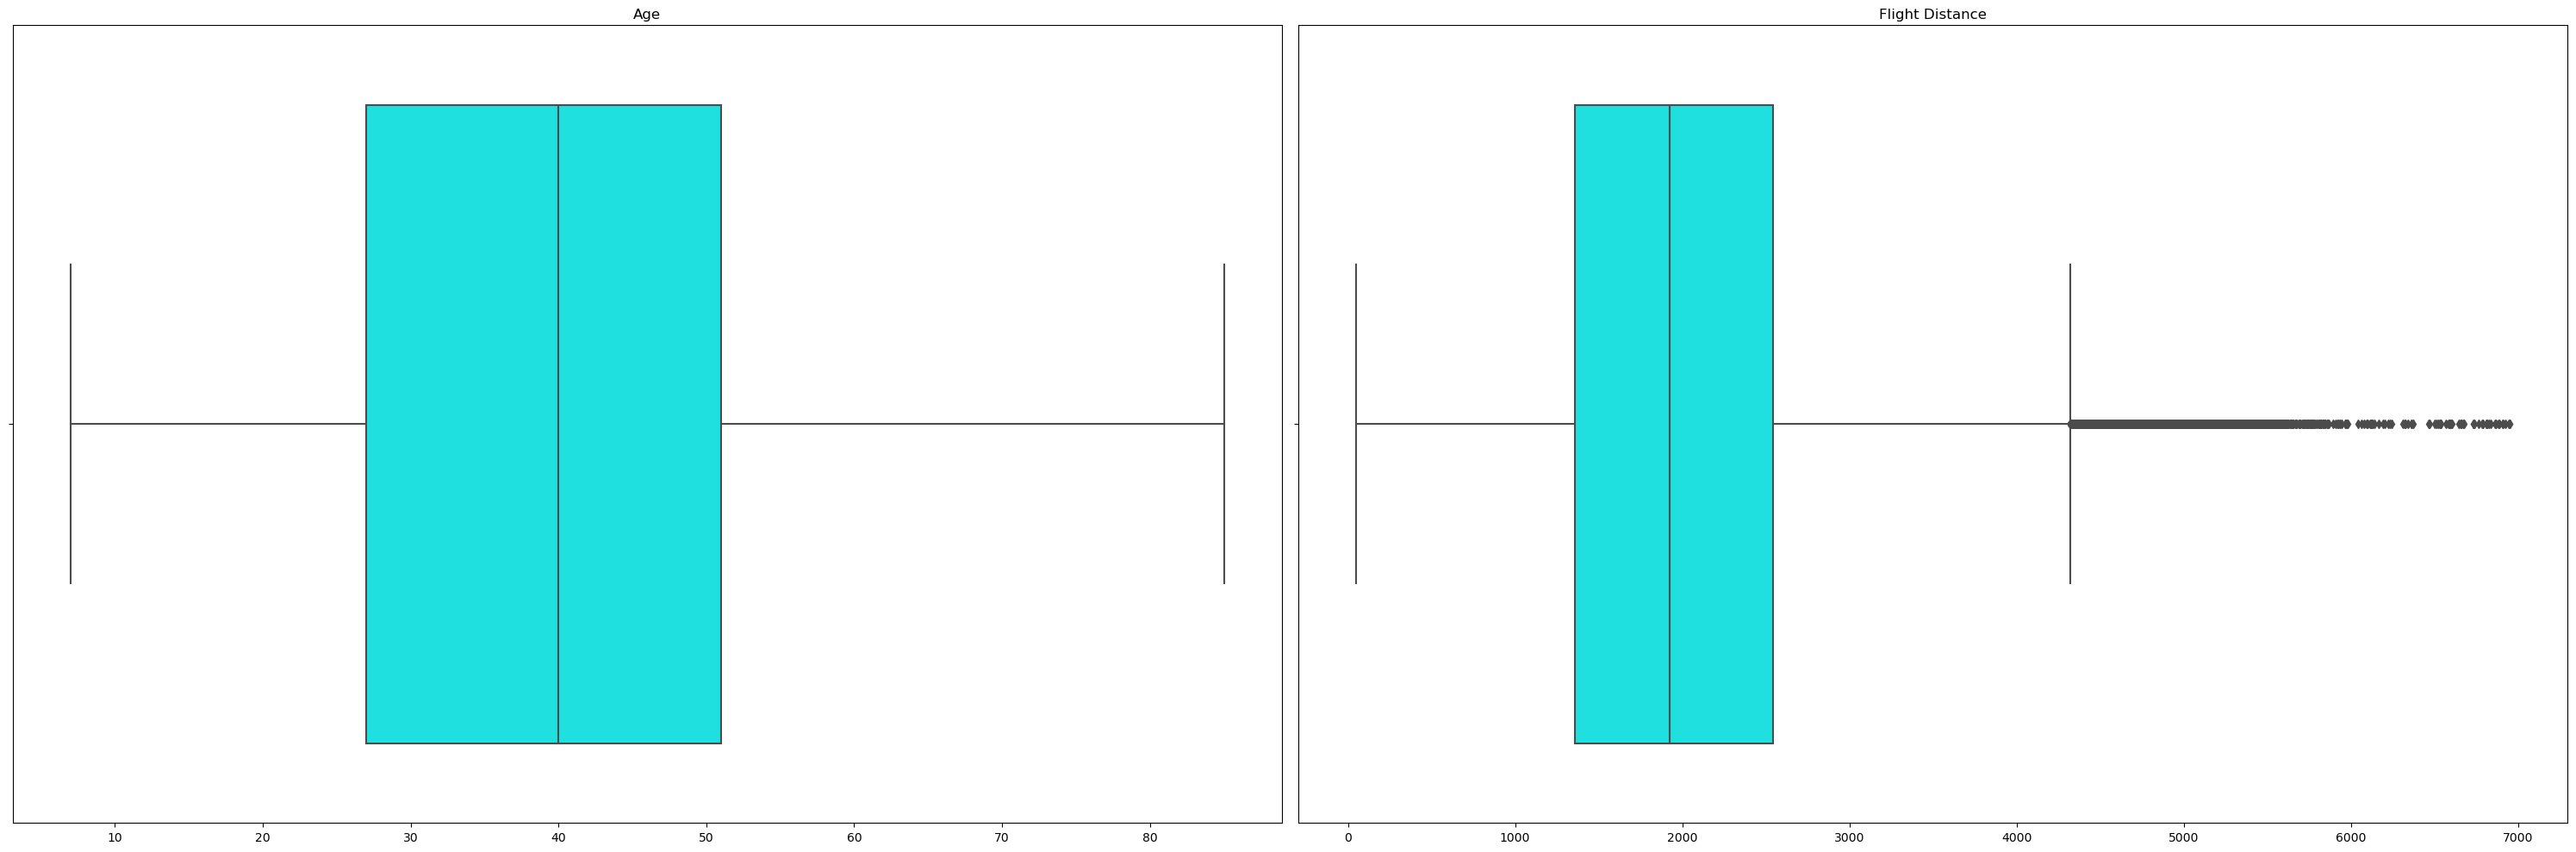

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(30,10))

df_numericas = df[['Age','Flight Distance']]

axes = axes.flat

for indice, cate in enumerate(df_numericas):

    sns.boxplot(x = df[cate], data = df, ax=axes[indice], color = "cyan"); # para trazar una línea de densidad

    axes[indice].set_title(cate)
    axes[indice].set_xlabel("")

fig.tight_layout();

Por lo que hacen nuestros outliers de las variables numéricas contínuas, vemos que no tenemos outliers para age pero si los tenemos para distancia de los vuelos. 
Nosotras como equipo, consideramos que la distancia de los vuelos determina los servicios prestados en el mismo. De esta forma consideramos justo hacer un modelo para vuelos más cortos y otro para vuelos más largos, ya que el resultado de la variable respuesta se puede ver influido por esta vasriable predictora. De esta manera, cortaremos por el tercer cuartil, y consideraremos vuelos cortos los que estén por debajo del mismo, y largos los que forman los outliers hasta el máximo valor.

In [21]:
# Sacamos el índice del punto de partición.
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] > Q3 + outlier_step)]
    
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        
    
    return outliers_data, dicc_indices

In [22]:
# Creamos el df con los outliers de flight distance, que corresponden a los vuelos largos.
largos, dict = detectar_outliers(['Flight Distance'], df)
largos.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Food and drink,Inflight entertainment,Ease of Online booking,On-board service,Checkin service,Cleanliness,Online boarding
145,satisfied,Female,Loyal Customer,21,Personal Travel,Eco,4804,0,0,0,5,4,2,3,5
540,satisfied,Female,Loyal Customer,13,Personal Travel,Eco,6792,0,0,1,3,4,1,3,1
588,satisfied,Female,Loyal Customer,63,Personal Travel,Business,6591,0,0,5,3,2,1,5,1
1160,dissatisfied,Male,Loyal Customer,35,Personal Travel,Eco,6470,1,1,3,1,2,3,2,3
1161,dissatisfied,Female,Loyal Customer,38,Personal Travel,Eco,5322,1,1,4,2,4,4,2,4


In [23]:
largos['Flight Distance'].min()

4321

In [24]:
# Creamos el df con la distancia de vuelos cortos, que serían las distancias de vuelo sin los outliers.
cortos = df[df['Flight Distance']< largos['Flight Distance'].min()]

In [25]:
cortos

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Food and drink,Inflight entertainment,Ease of Online booking,On-board service,Checkin service,Cleanliness,Online boarding
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,4,3,3,5,3,2
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,2,3,4,2,3,2
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,2,3,4,4,2
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,4,1,1,4,1,3
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,3,2,2,4,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,2,3,4,4,2
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,2,1,3,2,1,2,1
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,3,2,4,4,2,3,2
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,3,2,3,3,2,1,2


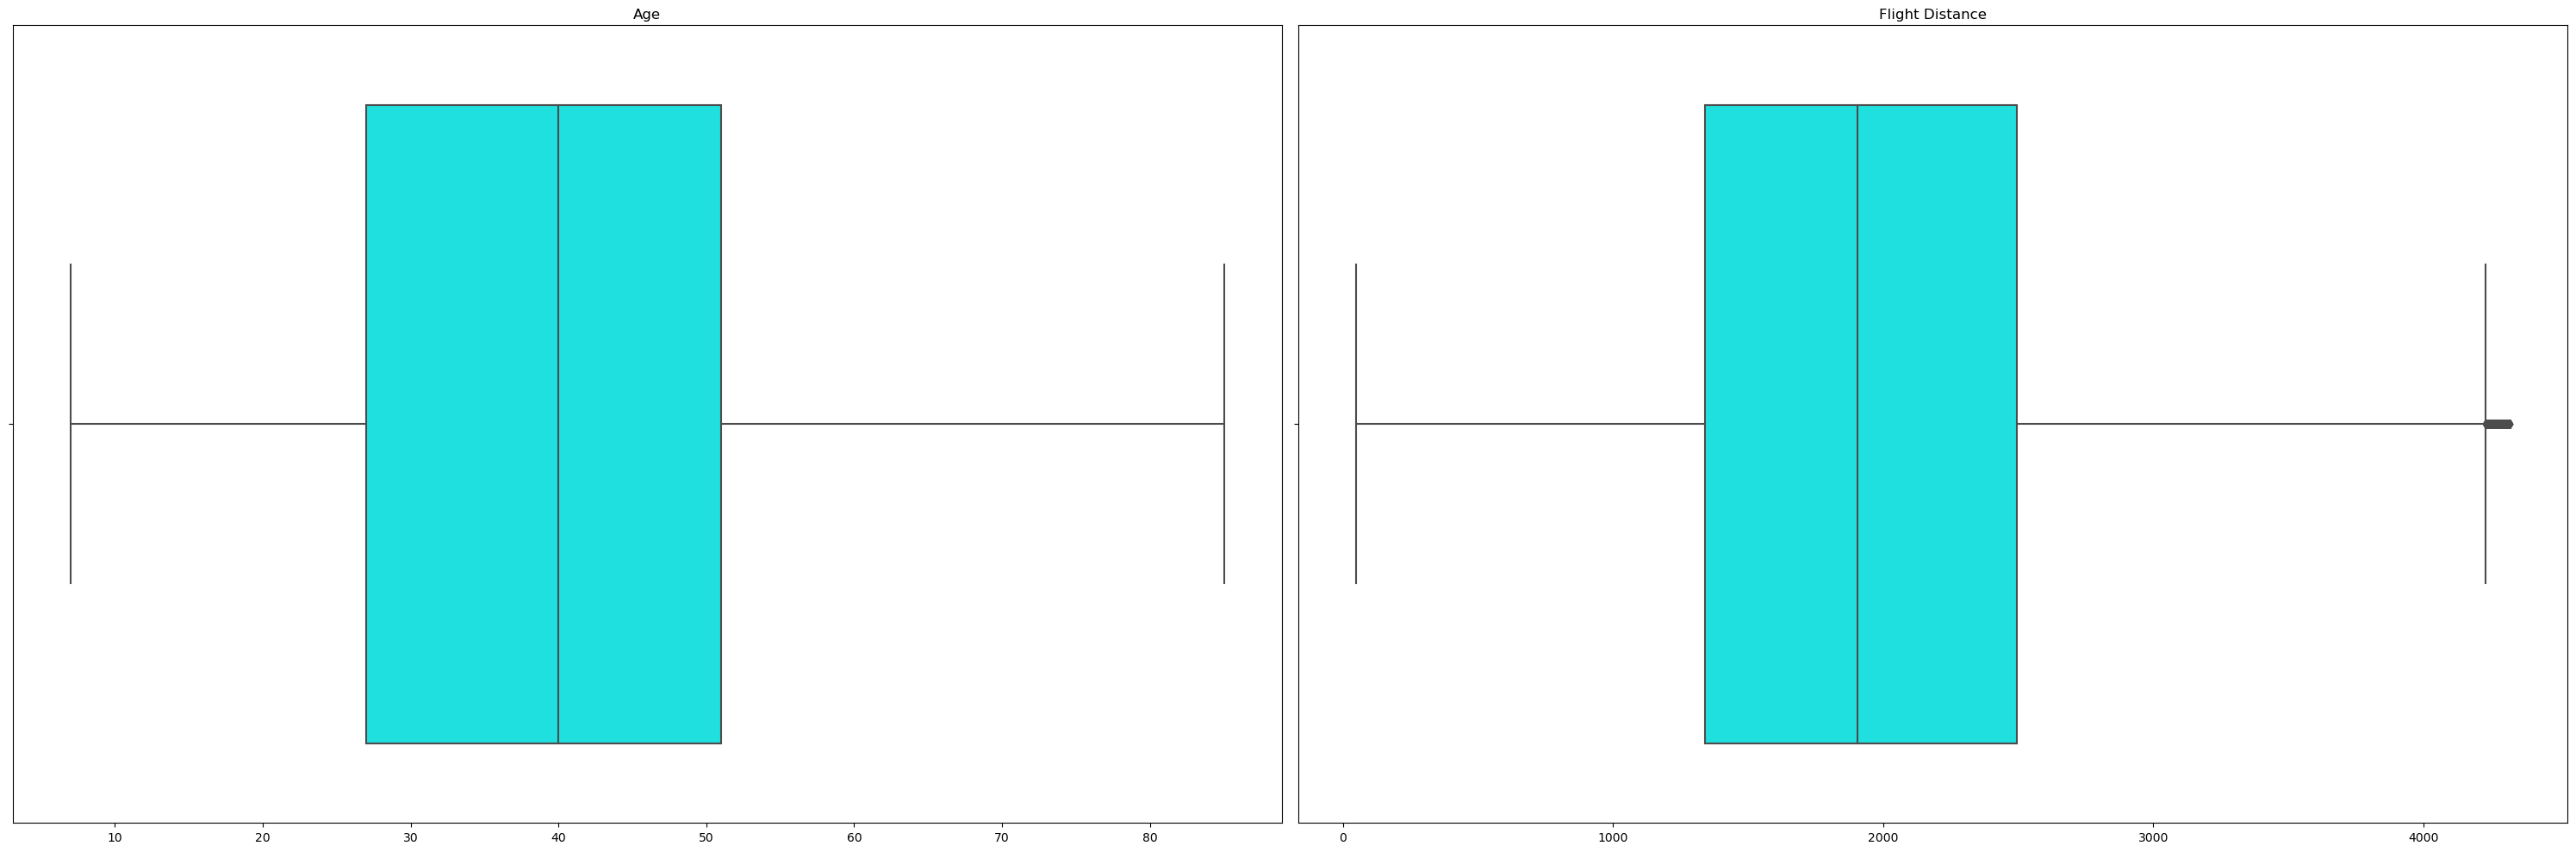

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(30,10))

df_numericas = df[['Age','Flight Distance']]

axes = axes.flat

for indice, cate in enumerate(df_numericas):

    sns.boxplot(x = cortos[cate], data = cortos, ax=axes[indice], color = "cyan"); # para trazar una línea de densidad

    axes[indice].set_title(cate)
    axes[indice].set_xlabel("")

fig.tight_layout();

Vemos que en el nuevo df aun nos quedaron algunos outliers. Vamos a verlos para decidir que hacemos con ellos.

In [28]:
outliers_cortos, dicc_outliers = detectar_outliers(['Flight Distance'], cortos)
outliers_cortos.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Food and drink,Inflight entertainment,Ease of Online booking,On-board service,Checkin service,Cleanliness,Online boarding
438,satisfied,Female,Loyal Customer,17,Personal Travel,Business,4242,0,0,2,5,3,2,4,2
2369,dissatisfied,Male,Loyal Customer,23,Personal Travel,Eco,4272,1,0,0,3,3,2,4,3
2585,dissatisfied,Male,Loyal Customer,57,Personal Travel,Eco,4287,1,1,4,3,1,4,1,4
4093,dissatisfied,Male,Loyal Customer,16,Personal Travel,Eco Plus,4256,1,1,1,5,2,1,3,5
4776,dissatisfied,Male,Loyal Customer,63,Personal Travel,Eco Plus,4290,1,1,3,3,5,3,4,3


In [29]:
outliers_cortos.shape

(302, 15)

En vista a que los outliers son muy poquitos en comparación con los datos totales de vuelos cortos que tenemos, decidimos reemplazarlos por la mediana.

In [30]:
# Reemplazamos los outliers por la mediana
for k, v in dicc_outliers.items():
    mediana = cortos['Flight Distance'].median() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
    for i in v: # iteremos por la lista de valores para cada columna
        cortos.loc[i,k] = mediana 



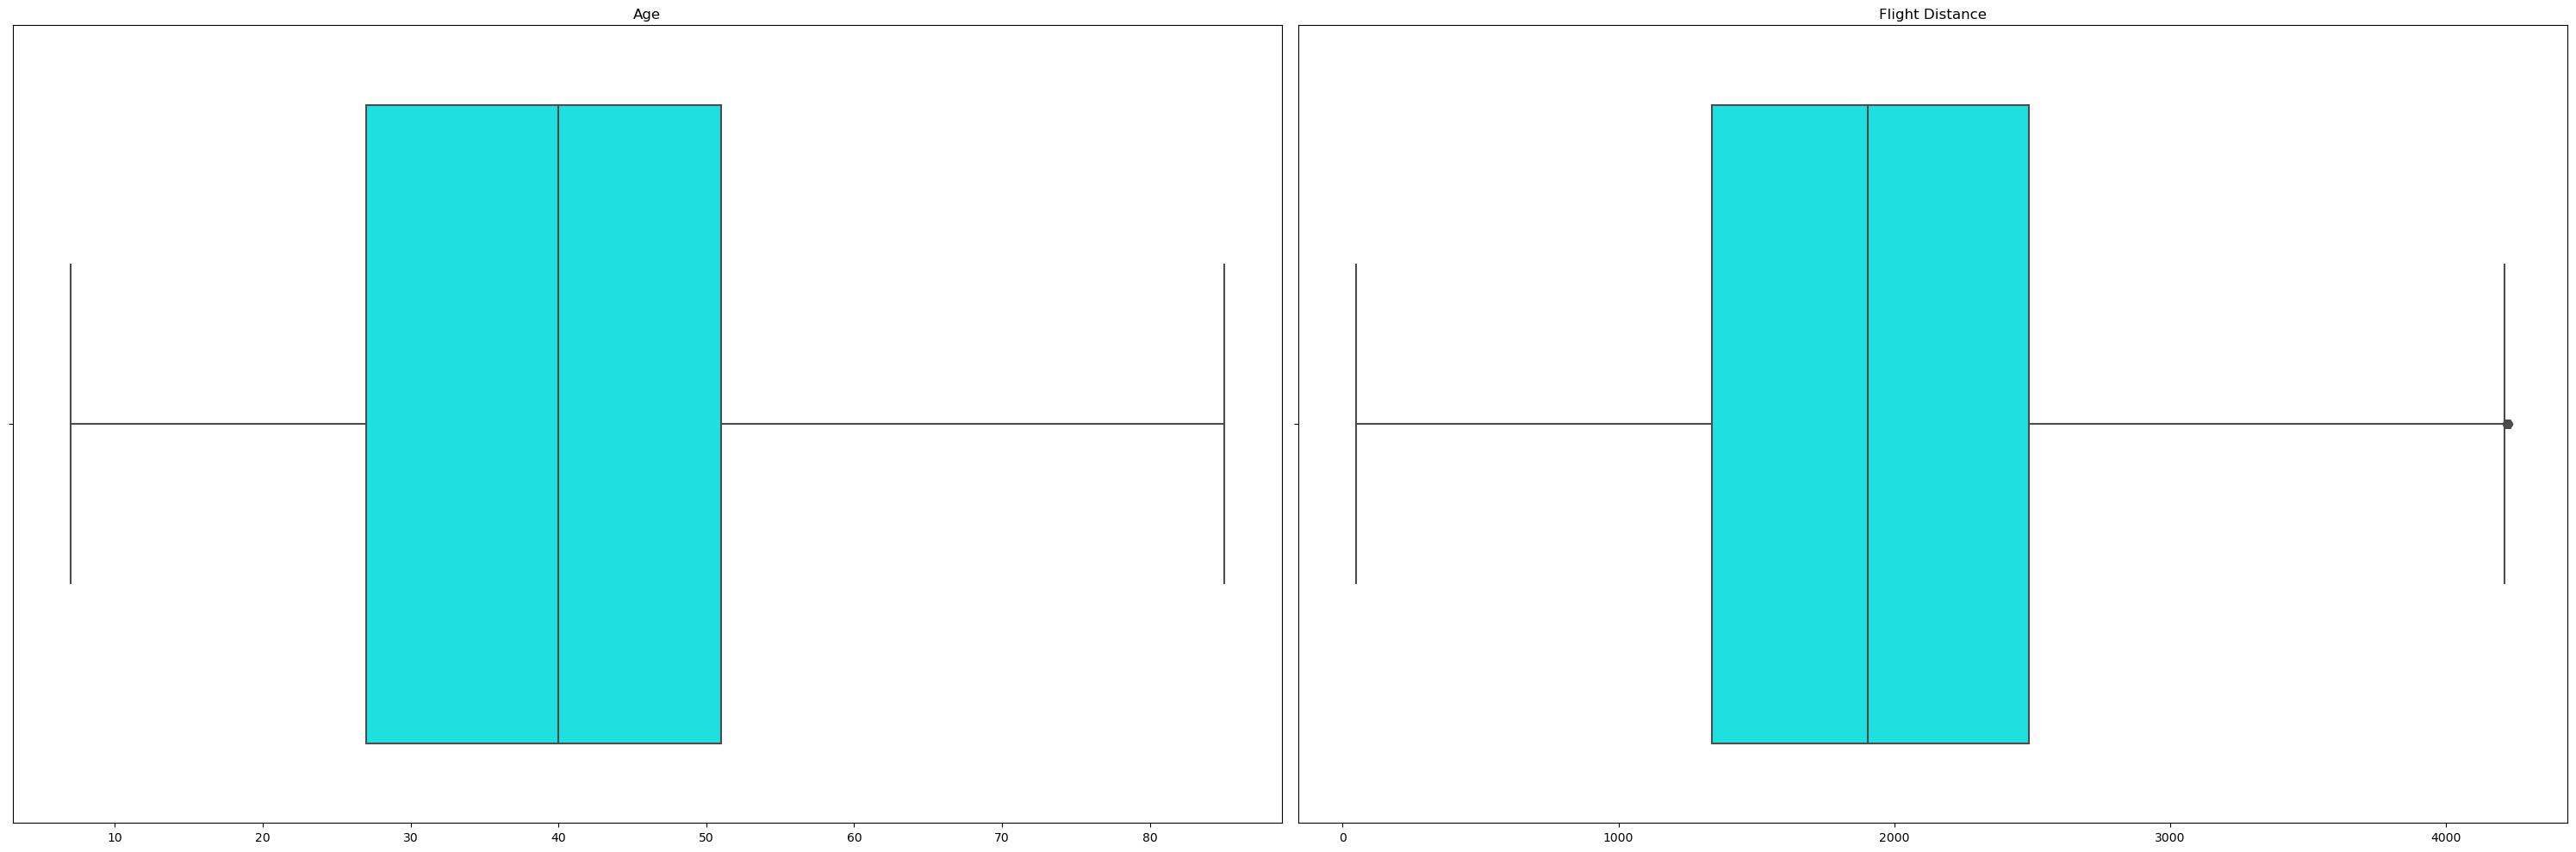

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(30,10))

df_numericas = df[['Age','Flight Distance']]

axes = axes.flat

for indice, cate in enumerate(df_numericas):

    sns.boxplot(x = cortos[cate], data = cortos, ax=axes[indice], color = "cyan"); # para trazar una línea de densidad

    axes[indice].set_title(cate)
    axes[indice].set_xlabel("")

fig.tight_layout();

In [32]:
out, ind2 = detectar_outliers(['Flight Distance'], cortos)

In [33]:
out.shape

(69, 15)

Nos aseguramos que la distribución de nuestras variables ha quedado igual.

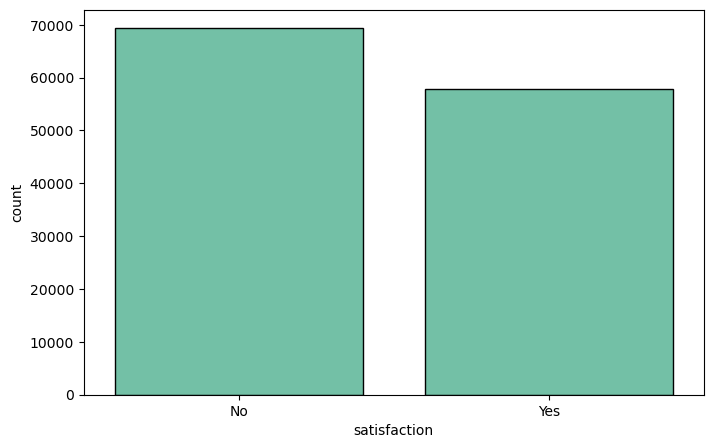

In [34]:
plt.figure(figsize=(8,5)) # para cambiar el tamaño de la figura

fig1 = sns.countplot(data = cortos, x = "satisfaction",  color = "mediumaquamarine",  edgecolor='black')
fig1.set(xticklabels=["No", "Yes"]) 
plt.show();

In [35]:
(cortos['satisfaction'].value_counts()/cortos.shape[0])*100

satisfied       54.509887
dissatisfied    45.490113
Name: satisfaction, dtype: float64

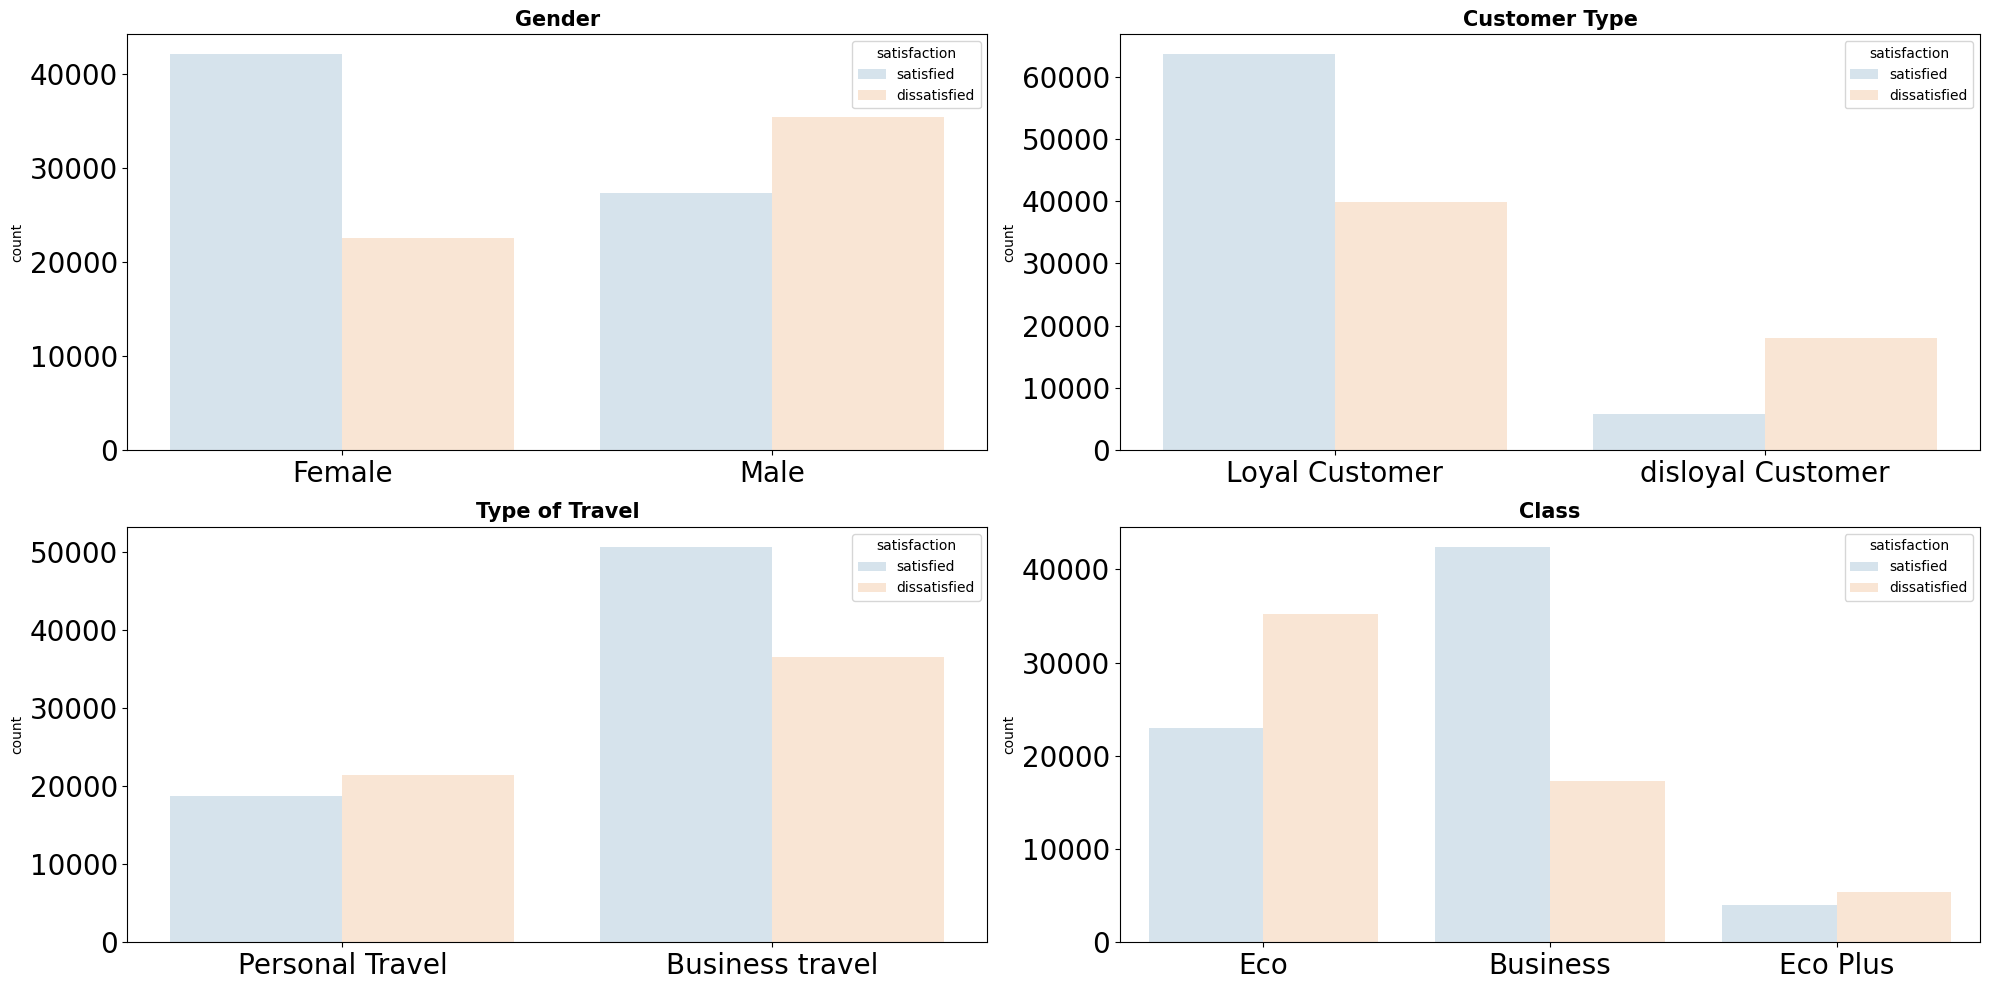

In [36]:
# Gráfico de distribución para cada variable categórica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))

axes = axes.flat
columnas_cat = cortos.select_dtypes(include = "object").columns.drop("satisfaction")

for i, colum in enumerate(columnas_cat): 
    sns.countplot(
        data = cortos,
        x = colum,
        hue = "satisfaction",
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    #axes[i].legend(loc= "upper right")

fig.tight_layout();

Los outliers solo se corrigen una vez. Los pocos que se generan a partir de el primer reemplazo se asumen y no se eliminan ni reemplazan por nada (siempre habrá una pequeña probabilidad de tener algun outlier).

Guardamos los distintos df (cortos y largos) en 2 archivos distintos

In [37]:
cortos.to_csv('./datos/cortos.csv')
largos.to_csv('./datos/largos.csv')